# Fourth Session of Stochastic Modelling

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/guglielmopadula/StochasticModelling2022-2023/blob/main/FourthSession.ipynb)


### A very fast recap on Discrete Time Markov Chain
A stochastic process $X_{t}$ satisfies the **Markov Property** if $$P(X_{t}|\{X_{k}| k<s\})=P(X_{t}|X_{s}) \quad \forall s<t$$.
If the state space of $X_{t}$ $S$ is finite and $t$ is discrete (let's call it $n$) then we have a **Discrete Time Markov Chain**.
Because of the Markov property and the bayes theorem we have $$P(X_{n}=j)=\sum_{i=1}^{|S|} P(X_{n}=j|X_{n-1}=i)P(X_{n-1}=j)=\sum_{i=1}^{S}a_{ij}(n)P(X_{n-1}=j)$$ so $$P(X_{n})=A(n)P(X_{n-1})$$.
If $A(n)$ does not depend on $n$, the DTMC is **time homogeneous**.

Let's try to study the convergence properties of the probability of an homogenous DTMC.
If $A$ is a DTMC matrix the $A\cdot 1=1$ so $1$ is a right eigenvector and $A$ has an eigenvalue $\lambda=1$ so it has also a right eigenvector $p$ such that $pA=p$. It can be further proven that $p\ge 0$ and $|p|_{1}=1$ so $p$ is an equilibrium probability. 
In general nothing can be said about convergence and uniqueness of the probability $p$ of equilibrium.
Before going depth in this problem, let's start talking about Discrete Time Markov chain simulation.

### Simulation of a DTMC and convergence of the trajectories

In [22]:
import numpy as np
def DtmcSimulation(A,p0,n):
    if not np.prod(A>=0):
        raise Exception("Elements are not non negative")
    if not np.prod(np.isclose(np.sum(A,axis=1),np.ones(A.shape[0]))):
        raise Exception("at least one row does not sum up to 1")
    if not np.isclose(np.sum(p0),1):
        raise Exception("initial probability does not sum up to 1")

    l=[]
    x0=np.random.choice(np.arange(p0.shape[0]),size=1,p=p0)
    l.append(x0)
    x=x0
    for i in range(1,n):
        p=A[x].reshape(-1)
        x=np.random.choice(np.arange(p.shape[0]),size=1,p=p)
        l.append(x)
    return l,A,p0


Let's try to use bad behaved matrices and vector and see if an exception is thrown.

In [23]:
A=np.random.rand(4,4)
p=np.random.rand(4)
print(p.shape[0])
DtmcSimulation(A,p,5)


4


Exception: at least one row does not sum up to 1

It woorks!!!

Let's suppose we just arrived at the Deus (a Trieste Disco Club), our situation can be described by the following three states:
1) Taking something at the Bar
2) Dancing
3) Taking our things and going home

Let's assume our markov chain is homogeneous. State 3 is absorbing.


In [24]:
import numpy as np
import matplotlib.pyplot as plt
#0: Bar
#1: Dancing
#2: Home
def DEUS_Simulation(n):
    A=np.array([[0.4,0.5,0.1],[0.5,0.4,0.1],[0,0,1]])
    p0=np.array([0.5,0.5,0])
    return DtmcSimulation(A,p0,n)

n=100
samples,A,p0=DEUS_Simulation(n)
print(samples)
    

[array([0]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), arr

**In general a trajectory of a DTMC will converge if and only if there is a least an absorbing state**

### Convergence of the steady state probability


We will know develop a machinery to understand the number of  steady state equilibrium probabilities.

Because every DTMC has a steady state solution it has at least an eigenvalues such that $||\lambda||=1$, so we can't use the theorem that we saw on the previous lab.
Howewer there are other useful properties:
- it can be proven that all the spectre $\Lambda(A)\subseteq \{\lambda \in \mathbb{C} \quad s.t \quad ||\lambda||_{2}\le 1\}$. Remember that ($||\alpha+i\beta||_{2}=\sqrt{\alpha^2+\beta^2}$)
- it can be proven that eigenvalues $\lambda$ such that $||\lambda||_{2}=1$ have the same algebraic and geometry multiplicity 
We are going to use the Jordan Decomposition, which is says that a general matrix $A$ can be decomposed as $$A=SJS^{-1}$$ where $J$ is of type:

$$\left(\begin{array}{lll|ll|l|l}
\lambda_{1} & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & \lambda_{1} & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & \lambda_{1} & 0 & 0 & 0 & 0 \\
\hline
 0 & 0 & 0 & \lambda_{2} & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & \lambda_{2} & 0 & 0 \\
\hline
0 & 0 & 0 & 0 & 0 & \lambda_{3}& 0 \\
 \hline
0 & 0 & 0 & 0 & 0 & 0 & \lambda_{4}
\end{array}\right)$$

So if we do $Y_{t}=X_{t}S$ we get a system which is decomposable in blocks of two types.
- block of type $$Y_{n+1}=Y_{n}\left(\begin{array}{lll} \lambda & 1 & 0 \\ 0 &\lambda & 1 \\ 0 & 0 & \lambda \end{array}\right)$$ in which the geometric and algebraic multiplicity differ. Notice that because of the property 2 and 1 we must have $||\lambda||<1$, so by the last lab theorem we have that this system block converges to $0$.
- block of type $y_{n+1}=\lambda y_{n}$. Because of property one we have $||\lambda||\le 1$.
  - if $||\lambda||<1$ it converges to $0$ because of the last lab theorem
  - if $||\lambda||=1$ we can't apply last lab theorem. However in this case $$\lambda=\cos(\theta)+i\sin(\theta)$$ for $\theta \in [0,2\pi]$ so $$\lambda^{k}=\cos(k\theta)+i\sin(k\theta)$$ which converges if and only if $\theta=0$ so
    -  if $\theta=0$ and so $\lambda=1$ the point is an equilibrium point and the block converges
    -  if $\theta\neq 0$ and so $\lambda\neq 1$ and the block does not converge

With this observation we can formulate our machinery:
- compute the eigenvalues of the stochastic matrix
- use the following table

$$\begin{array}{ |c|c|c| } 
 \hline
  & \{i \text{ s.t } \lambda_{i}\neq 1 \wedge ||\lambda_{i}||_{2}=1  \}|=0 & \{i \text{ s.t } \lambda_{i}\neq 1 \wedge ||\lambda_{i}||_{2}=1  \}|>0 \\
 \hline
 |\{i \text{ s.t } \lambda_{i}=1 \}|=1 & \text{Unique steady state} & \text{No steady state} \\
 \hline
 |\{i \text{ s.t } \lambda_{i}=1 \}|>1 & \text{Infinite number of steady states} & \text{No steady state} \\ 
 \hline
\end{array}$$

Let's now check the convergence of our matrix.


one unique steady state distribution


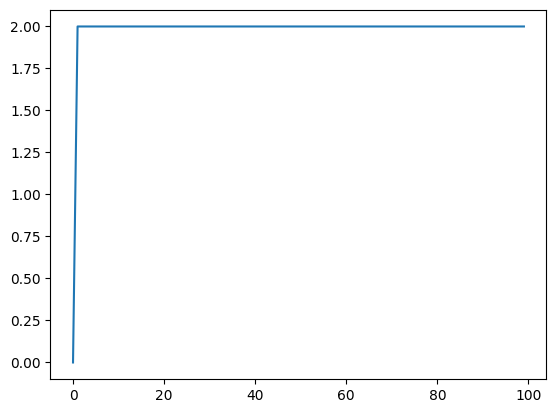

In [25]:
def check_convergence(A,eps):
    eigens=np.linalg.eigvals(A)
    eigens=eigens[np.abs(np.abs(eigens)-1)<eps] ##exctract eigenvalues of the unit circle
    equal_ones=eigens[np.logical_and(eigens>0,np.abs(np.imag(eigens))<eps)]
    if len(equal_ones)<len(eigens):
        print("no steady state distribution")
    else:
        if len(equal_ones)==1:
            print("one unique steady state distribution")
        else:
            print("infinite number of steady states")
    
    
    
    
check_convergence(A,0.01)
plt.plot(np.arange(len(samples)),np.array(samples))

Let's now write a general code for computing steady state probability and apply it to our DEUS simulation:

one unique steady state distribution


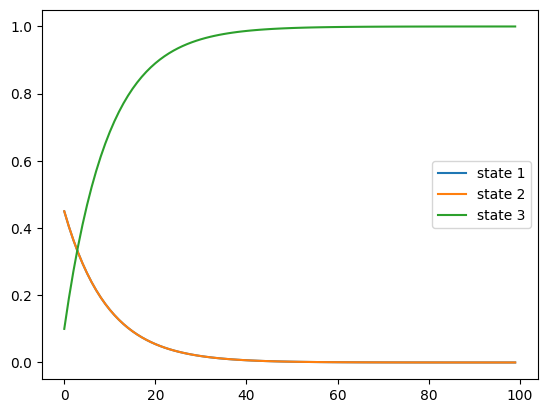

In [26]:
def steadystate_probability(A,p0,n):
    p=p0
    l=[]
    for i in range(n):
        p=p@A
        l.append(p)
    return l

check_convergence(A,0.001)
prob=steadystate_probability(A,p0,n)
plt.plot(np.arange(len(prob)),np.array(prob),label=["state 1","state 2","state 3"])
plt.legend()


Example A:
$$\left(\begin{array}{cccc}
0.1 & 0.1 & 0.1 & 0.7 \\
0.25 & 0.25 & 0.25 & 0.25 \\
0.3 & 0.3 & 0.2 & 0.2 \\
0.4 & 0.2 & 0.3 & 0.1
\end{array}\right)$$


one unique steady state distribution


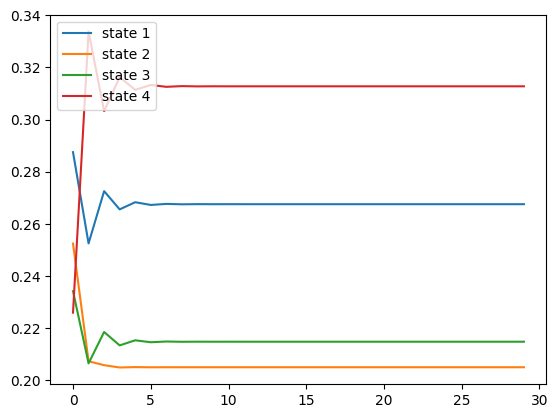

In [27]:
n=30
A=np.array([[0.1,0.1,0.1,0.7],
   [0.25,0.25,0.25,0.25],
   [0.3,0.3,0.2,0.2],
  [0.4,0.2,0.3,0.1]])
p0=np.random.rand(4)
p0=p0/np.sum(p0)

check_convergence(A,0.001)
prob=steadystate_probability(A,p0,n)
plt.plot(np.arange(len(prob)),np.array(prob),label=["state 1","state 2","state 3","state 4"])
plt.legend()


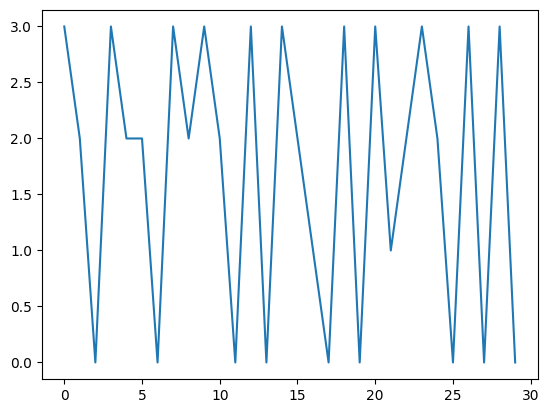

In [28]:
trajectory,_,_=DtmcSimulation(A,p0,n)
plt.plot(np.arange(len(trajectory)),np.array(trajectory))

Example B:
$$\left(\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 0.5 & 0.2 & 0.3 \\
0 & \frac{1}{3} & \frac{1}{3} & \frac{1}{3} \\
0 & \frac{2}{3} & \frac{1}{3} & 0
\end{array}\right)$$

infinite number of steady states


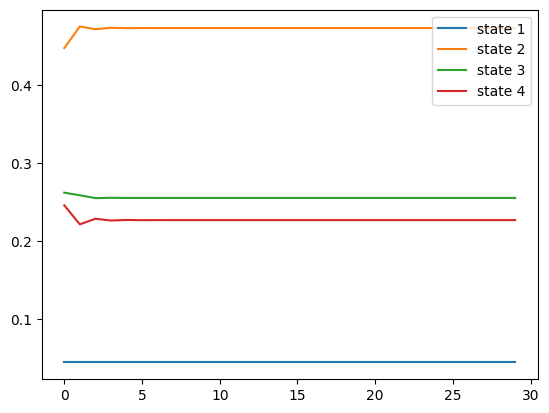

In [29]:
A=np.array([[1,0,0,0],
   [0,0.5,0.2,0.3],
   [0,1/3,1/3,1/3],
  [0,2/3,1/3,0]])

check_convergence(A,0.001)
prob=steadystate_probability(A,p0,n)
plt.plot(np.arange(len(prob)),np.array(prob),label=["state 1","state 2","state 3","state 4"])
plt.legend()



Let's now try a new starting probability

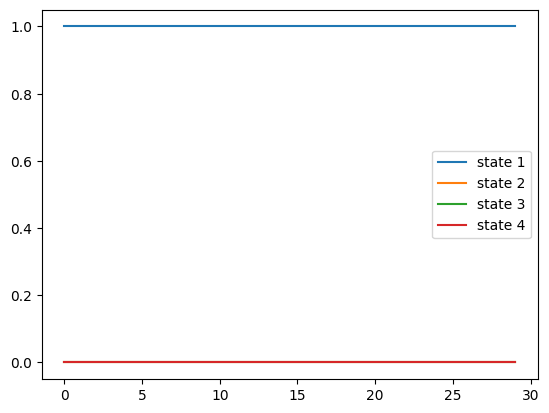

In [30]:
p1=np.array([1,0,0,0])
prob=steadystate_probability(A,p1,n)
plt.plot(np.arange(len(prob)),np.array(prob),label=["state 1","state 2","state 3","state 4"])
plt.legend()


And now let's try a combination of the previous two.

[0.52233809 0.21112854 0.17888267 0.0876507 ]


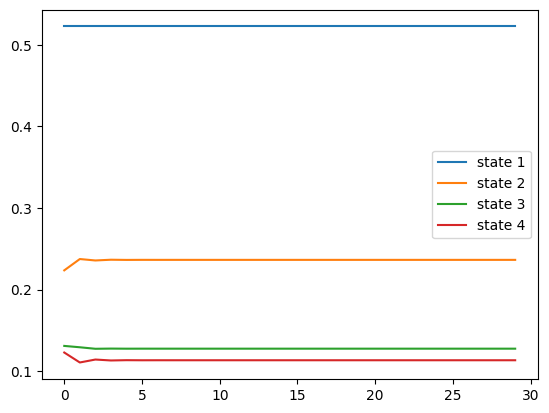

In [31]:
p2=0.5*p0+0.5*p1
print(p2)
prob=steadystate_probability(A,p2,n)
plt.plot(np.arange(len(prob)),np.array(prob),label=["state 1","state 2","state 3","state 4"])
plt.legend()


With different combination you can obtain infinite steady state distributions.

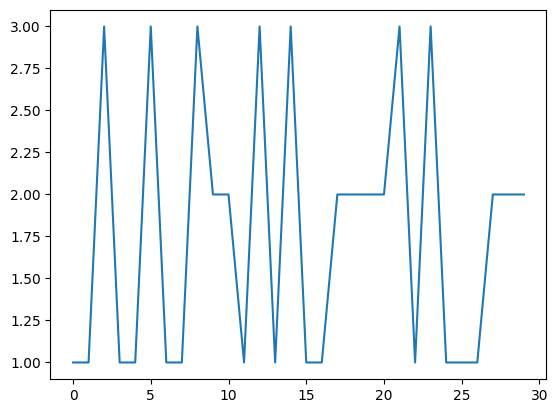

In [32]:
trajectory,_,_=DtmcSimulation(A,p0,n)
plt.plot(np.arange(len(trajectory)),np.array(trajectory))

Example C:
$$\left(\begin{array}{cccc}
0 & 0.5 & 0 & 0.5 \\
0.75 & 0 & 0.25 & 0 \\
0 & 0.75 & 0 & 0.25 \\
0.75 & 0 & 0.25 & 0
\end{array}\right)$$

no steady state distribution


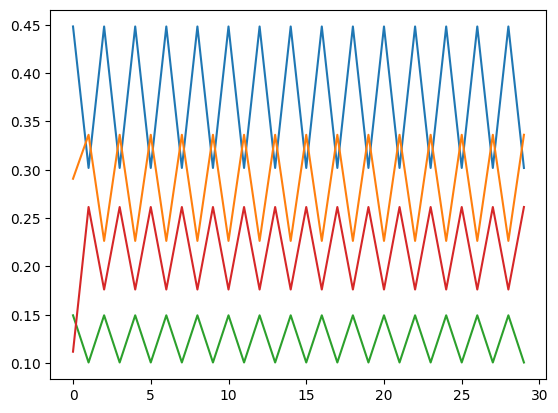

In [33]:
A=np.array([[0,0.5,0,0.5],
   [0.75,0,0.25,0],
   [0,0.75,0,0.25],
  [0.75,0,0.25,0]])
check_convergence(A,0.001)

prob=steadystate_probability(A,p0,n)
plt.plot(np.arange(len(prob)),np.array(prob),label=["state 1","state 2","state 3","state 4"])




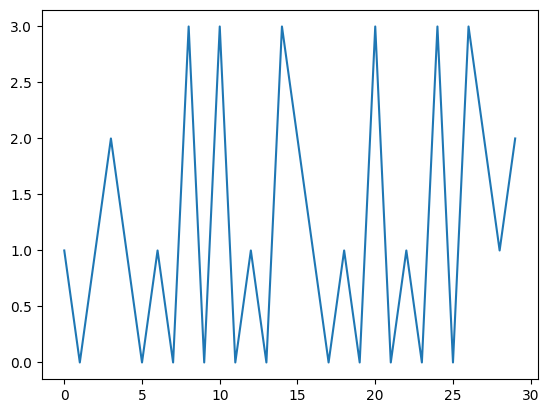

In [34]:
trajectory,_,_=DtmcSimulation(A,p0,n)
plt.plot(np.arange(len(trajectory)),np.array(trajectory))

Let's try to assess the relation between trajectiory convergence and probability convergence. We have seen that:
- in the DEUX example both trajectory and probability converge
- in example A and B the probability converge but not the trajectory
- in example C neither the trajectory neither the probability converge

If every possible trajectory converges, then it means that it converges to a absorbing state, so it means that the markov chain is absorbing and so that the chain admits a steady state probability. So it is not possible to have a DTMC such that the trajectory converges and the probability does not.